<h1 style="text-align: center; font-size: 36px;">
  🛩️ Welcome aboard the Flight Delay Exploration Journey! 🌍✈️
</h1>

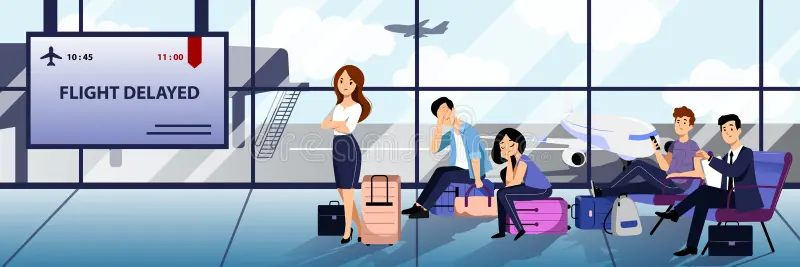

**Flight Delay Dataset Overview:**

- **YEAR**: Year the flight took place (2015). Useful for analyzing yearly trends or seasonal changes.
- **MONTH**: Month the flight took place. Helps with monthly or seasonal trend analysis.
- **DAY**: Day of the month the flight occurred. Useful for daily trend analysis.
- **DAY_OF_WEEK**: Day of the week (1 for Monday to 7 for Sunday). Helps analyze trends by weekday.
- **AIRLINE**: Airline code (e.g., "DL" for Delta, "AA" for American Airlines). Useful for analyzing airline-specific delay patterns.
- **FLIGHT_NUMBER**: Unique flight number for each flight (repeated for same route across days).
- **TAIL_NUMBER**: Unique identifier for the aircraft. Can help track performance or maintenance for specific planes.
- **ORIGIN_AIRPORT**: Code for the origin airport. Useful for departure airport-specific analysis.
- **DESTINATION_AIRPORT**: Code for the destination airport. Useful for arrival airport-specific analysis.
- **SCHEDULED_DEPARTURE**: Scheduled departure time in HHMM format.
- **DEPARTURE_TIME**: Actual departure time in HHMM format. Used to calculate `DEPARTURE_DELAY`.
- **DEPARTURE_DELAY**: Departure delay in minutes (negative for early, positive for late). Key feature for delay analysis.
- **TAXI_OUT**: Time spent taxiing from the gate to the runway in minutes. Useful for analyzing ground operation delays.
- **WHEELS_OFF**: Time when the plane left the ground in HHMM format. Useful for understanding departure dynamics.
- **SCHEDULED_TIME**: Scheduled total travel time in minutes (departure to arrival).
- **ELAPSED_TIME**: Actual total travel time in minutes. Comparison with `SCHEDULED_TIME` indicates in-flight delays or early arrivals.
- **AIR_TIME**: Time spent in the air in minutes. Useful for analyzing in-flight operations.
- **DISTANCE**: Distance between origin and destination airports in miles. Can impact delay likelihood.
- **WHEELS_ON**: Time when the plane touched down in HHMM format. Useful for tracking actual arrival dynamics.
- **TAXI_IN**: Time spent taxiing from runway to gate in minutes. Useful for destination ground operations analysis.
- **SCHEDULED_ARRIVAL**: Scheduled arrival time in HHMM format.
- **ARRIVAL_TIME**: Actual arrival time in HHMM format.
- **ARRIVAL_DELAY**: Arrival delay in minutes (negative for early, positive for late). Key feature for predicting delays.
- **DIVERTED**: Indicates if the flight was diverted (1 for yes, 0 for no). Useful for analyzing disruptions.
- **CANCELLED**: Indicates if the flight was canceled (1 for yes, 0 for no). Useful for analyzing cancellation trends.
- **CANCELLATION_REASON**: Reason for cancellation if canceled:
  - 'A': Airline-related reasons
  - 'B': Weather
  - 'C': NAS (National Airspace System)
  - 'D': Security
- **AIR_SYSTEM_DELAY**: Delay due to National Airspace System issues (e.g., air traffic control). Helps identify delay sources.
- **SECURITY_DELAY**: Delay due to security-related issues. Provides context for specific delay causes.
- **AIRLINE_DELAY**: Delay attributed to airline issues (e.g., crew or maintenance).
- **LATE_AIRCRAFT_DELAY**: Delay due to late arrival of the aircraft from a previous flight. Indicates delays carried over from prior flights.
- **WEATHER_DELAY**: Delay due to weather-related issues. Allows analysis of weather impact on flight schedules.


**Setting Up PySpark Session and Exploring the Dataset**

Initializes a Spark session, loads a CSV dataset of flight information into a DataFrame, and repartitions the data into 8 partitions to optimize it for distributed processing in a cluster environment.

In [2]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Airline Delay Analysis") \
    .getOrCreate()

# Load the dataset
file_path = "/content/flights.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Repartition the DataFrame for distributed processing
df = df.repartition(8)

In [3]:
# Show the schema of the DataFrame
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- Unnamed: 0.1: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: double (nullable = true)
 |-- DEPARTURE_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- SCHEDULED_TIME: double (nullable = true)
 |-- ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- SCHEDULE

OBSERVATION: The schema shows a mix of numerical and string columns describing various flight details, including scheduling, delays, and cancellations. Key delay metrics, such as DEPARTURE_DELAY and ARRIVAL_DELAY, are stored as doubles, while categorical data like AIRLINE and CANCELLATION_REASON are represented as strings.

In [4]:
# Display the first 10 rows of the DataFrame
df.show(10)

+------+----------+------------+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|   _c0|Unnamed: 0|Unnamed: 0.1|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+------+----------+------------+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+----------------

In [5]:
# Count total rows in the DataFrame
row_count = df.count()
print(f"Total Rows: {row_count}")

Total Rows: 274964


In [6]:
# Print the column names to inspect if there are any unnecessary columns
print(df.columns)

['_c0', 'Unnamed: 0', 'Unnamed: 0.1', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [7]:
# Drop unnecessary columns
df = df.drop('_c0', "Unnamed: 0", "Unnamed: 0.1")

In [8]:
print(df.columns)

['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


In [9]:
# Summary statistics for numerical columns
df.describe().show()

+-------+------+-----------------+------------------+------------------+-------+------------------+-----------+--------------+-------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+
|summary|  YEAR|            MONTH|               DAY|       DAY_OF_WEEK|AIRLINE|     FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|    DEPARTURE_TIME|  DEPARTURE_DELAY|          TAXI_OUT|        WHEELS_OFF|    SCHEDULED_TIME|     ELAPSED_TIME|         AIR_TIME|         DISTANCE|         WHEELS_ON|           TAXI_IN| SCHEDULED_ARRIVAL|      ARRIVAL_TIME|     ARRIVAL_DELAY|            DIVERTED| 

In [10]:
from pyspark.sql.functions import col, isnan, when, count

# Count null values for each column
null_counts = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns])
null_counts.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

**Data Cleaning**


In [11]:
from pyspark.sql.functions import col

# List of numerical columns to check correlations with ARRIVAL_DELAY
numeric_columns = ["YEAR", "MONTH", "DAY", "DAY_OF_WEEK", "SCHEDULED_DEPARTURE", "DEPARTURE_TIME",
                   "DEPARTURE_DELAY", "TAXI_OUT", "WHEELS_OFF", "SCHEDULED_TIME", "ELAPSED_TIME",
                   "AIR_TIME", "DISTANCE", "WHEELS_ON", "TAXI_IN", "SCHEDULED_ARRIVAL",
                   "ARRIVAL_TIME", "DIVERTED", "CANCELLED", "AIR_SYSTEM_DELAY", "SECURITY_DELAY",
                   "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]

# Calculate correlation between each column and ARRIVAL_DELAY
correlations = {}
for col_name in numeric_columns:
    try:
        corr_value = df.stat.corr(col_name, "ARRIVAL_DELAY")
        correlations[col_name] = corr_value
        print(f"Correlation between {col_name} and ARRIVAL_DELAY: {corr_value}")
    except Exception as e:
        print(f"Could not calculate correlation for {col_name}: {e}")

Correlation between YEAR and ARRIVAL_DELAY: nan
Correlation between MONTH and ARRIVAL_DELAY: -0.024352777108796363
Correlation between DAY and ARRIVAL_DELAY: -0.0033400355298126533
Correlation between DAY_OF_WEEK and ARRIVAL_DELAY: -0.017470282884143266
Correlation between SCHEDULED_DEPARTURE and ARRIVAL_DELAY: 0.10616476102667712
Correlation between DEPARTURE_TIME and ARRIVAL_DELAY: 0.15680305901898187
Correlation between DEPARTURE_DELAY and ARRIVAL_DELAY: 0.9370647138497326
Correlation between TAXI_OUT and ARRIVAL_DELAY: 0.22849915911073318
Correlation between WHEELS_OFF and ARRIVAL_DELAY: 0.1532253390309954
Correlation between SCHEDULED_TIME and ARRIVAL_DELAY: -0.02643395889814051
Correlation between ELAPSED_TIME and ARRIVAL_DELAY: 0.035507434779997384
Correlation between AIR_TIME and ARRIVAL_DELAY: -0.000651405340185179
Correlation between DISTANCE and ARRIVAL_DELAY: -0.0218286170695651
Correlation between WHEELS_ON and ARRIVAL_DELAY: 0.05701415185173219
Correlation between TAXI_IN

In [12]:
# Define columns to drop based on low correlation with ARRIVAL_DELAY
low_correlation_columns = ["YEAR", "MONTH", "DAY", "DAY_OF_WEEK", "SCHEDULED_TIME",
                           "ELAPSED_TIME", "AIR_TIME", "DISTANCE", "SCHEDULED_ARRIVAL",
                           "ARRIVAL_TIME", "DIVERTED", "CANCELLED", "CANCELLATION_REASON"]

# Drop low-correlation columns
df = df.drop(*low_correlation_columns)

# Verify remaining columns
print("Remaining Columns:", df.columns)

Remaining Columns: ['AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']


OBSERVATION: The correlation analysis reveals that certain features, such as DEPARTURE_DELAY, TAXI_OUT, AIR_SYSTEM_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY, have moderate to strong correlations with ARRIVAL_DELAY. Low-correlation columns are removed to streamline the dataset, keeping only features more likely to impact arrival delay predictions.

In [13]:
from pyspark.sql.functions import col, mean

# Check for missing values
df.select([col(c).isNull().cast("int").alias(c) for c in df.columns]).summary("count", "mean").show()

# Drop rows with missing values in essential columns for delay prediction
df = df.dropna(subset=["DEPARTURE_DELAY", "ARRIVAL_DELAY"])

# Alternatively, you can fill missing values in certain columns if they are not critical
df = df.fillna({"AIR_SYSTEM_DELAY": 0, "SECURITY_DELAY": 0, "AIRLINE_DELAY": 0,
                "LATE_AIRCRAFT_DELAY": 0, "WEATHER_DELAY": 0, "TAXI_OUT": 0, "TAXI_IN": 0})

+-------+-------+-------------+--------------------+--------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+
|summary|AIRLINE|FLIGHT_NUMBER|         TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|      DEPARTURE_TIME|     DEPARTURE_DELAY|           TAXI_OUT|         WHEELS_OFF|          WHEELS_ON|            TAXI_IN|       ARRIVAL_DELAY|  AIR_SYSTEM_DELAY|    SECURITY_DELAY|     AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|     WEATHER_DELAY|
+-------+-------+-------------+--------------------+--------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------

In [14]:
# Drop duplicate rows based on all columns
df = df.dropDuplicates()

In [15]:
# Convert columns to the appropriate types (e.g., integers or doubles)
from pyspark.sql.types import IntegerType, DoubleType

df = df.withColumn("FLIGHT_NUMBER", col("FLIGHT_NUMBER").cast(IntegerType())) \
       .withColumn("SCHEDULED_DEPARTURE", col("SCHEDULED_DEPARTURE").cast(IntegerType())) \
       .withColumn("DEPARTURE_TIME", col("DEPARTURE_TIME").cast(DoubleType())) \
       .withColumn("DEPARTURE_DELAY", col("DEPARTURE_DELAY").cast(DoubleType())) \
       .withColumn("TAXI_OUT", col("TAXI_OUT").cast(DoubleType())) \
       .withColumn("WHEELS_OFF", col("WHEELS_OFF").cast(DoubleType())) \
       .withColumn("WHEELS_ON", col("WHEELS_ON").cast(DoubleType())) \
       .withColumn("TAXI_IN", col("TAXI_IN").cast(DoubleType())) \
       .withColumn("ARRIVAL_DELAY", col("ARRIVAL_DELAY").cast(DoubleType())) \
       .withColumn("AIR_SYSTEM_DELAY", col("AIR_SYSTEM_DELAY").cast(DoubleType())) \
       .withColumn("SECURITY_DELAY", col("SECURITY_DELAY").cast(DoubleType())) \
       .withColumn("AIRLINE_DELAY", col("AIRLINE_DELAY").cast(DoubleType())) \
       .withColumn("LATE_AIRCRAFT_DELAY", col("LATE_AIRCRAFT_DELAY").cast(DoubleType())) \
       .withColumn("WEATHER_DELAY", col("WEATHER_DELAY").cast(DoubleType()))

In [16]:
# Filter out rows with invalid values
df = df.filter((col("DEPARTURE_DELAY") >= -15) &   # allowing some negative for early departure
               (col("ARRIVAL_DELAY") >= -15) &     # allowing some negative for early arrival
               (col("TAXI_OUT") >= 0) &
               (col("TAXI_IN") >= 0) &
               (col("AIR_SYSTEM_DELAY") >= 0) &
               (col("SECURITY_DELAY") >= 0) &
               (col("AIRLINE_DELAY") >= 0) &
               (col("LATE_AIRCRAFT_DELAY") >= 0) &
               (col("WEATHER_DELAY") >= 0))

This transformation helps to normalize feature values, which is essential for improving model performance and comparability across features.

In [17]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler

# Assemble the columns that need to be scaled
numeric_cols = ["DEPARTURE_DELAY", "TAXI_OUT", "TAXI_IN", "AIR_SYSTEM_DELAY",
                "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]

# Create a vector for these columns
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features_unscaled")
df = assembler.transform(df)

# Apply MinMaxScaler
scaler = MinMaxScaler(inputCol="features_unscaled", outputCol="features_scaled")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# Show transformed scaled features
df.select("features_scaled").show(10)

+--------------------+
|     features_scaled|
+--------------------+
|(8,[0,1,2],[0.007...|
|(8,[0,1,2],[0.009...|
|[0.02371273712737...|
|(8,[0,1,2],[0.018...|
|(8,[0,1,2],[0.006...|
|(8,[0,1,2],[0.006...|
|(8,[0,1,2],[0.010...|
|(8,[0,1,2],[0.008...|
|[0.04403794037940...|
|(8,[0,1,2],[0.011...|
+--------------------+
only showing top 10 rows



The code creates a new column, IS_DELAYED, which labels flights as delayed (1) if ARRIVAL_DELAY is greater than 0, and on-time (0) otherwise. This binary classification provides a clear indicator of flight delays, useful for further analysis or predictive modeling.

In [18]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Define a UDF to label flights as delayed or not
def classify_delay(arrival_delay):
    return 1 if arrival_delay > 0 else 0

# Register the UDF
classify_delay_udf = udf(classify_delay, IntegerType())

# Create a new column 'IS_DELAYED' based on ARRIVAL_DELAY
df = df.withColumn("IS_DELAYED", classify_delay_udf(col("ARRIVAL_DELAY")))

In [19]:
# Show the schema to verify transformations
df.printSchema()

# Display the first few rows to check the final data
df.show(10)

root
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: double (nullable = true)
 |-- DEPARTURE_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = false)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = false)
 |-- ARRIVAL_DELAY: double (nullable = true)
 |-- AIR_SYSTEM_DELAY: double (nullable = false)
 |-- SECURITY_DELAY: double (nullable = false)
 |-- AIRLINE_DELAY: double (nullable = false)
 |-- LATE_AIRCRAFT_DELAY: double (nullable = false)
 |-- WEATHER_DELAY: double (nullable = false)
 |-- features_unscaled: vector (nullable = true)
 |-- features_scaled: vector (nullable = true)
 |-- IS_DELAYED: integer (nullable = true)

+-------+-------------+-----------+-

**DATA ANALYSIS**

In [20]:
# Register DataFrame as a temporary SQL view
df.createOrReplaceTempView("flights")

In [21]:
# Mean and standard deviation for numerical columns
spark.sql("""
SELECT
    AVG(DEPARTURE_DELAY) AS avg_departure_delay,
    AVG(ARRIVAL_DELAY) AS avg_arrival_delay,
    STDDEV(DEPARTURE_DELAY) AS stddev_departure_delay,
    STDDEV(ARRIVAL_DELAY) AS stddev_arrival_delay
FROM flights
""").show()

+-------------------+------------------+----------------------+--------------------+
|avg_departure_delay| avg_arrival_delay|stddev_departure_delay|stddev_arrival_delay|
+-------------------+------------------+----------------------+--------------------+
| 13.072311835343903|11.284832330338087|     40.76303959249026|   41.62034393677462|
+-------------------+------------------+----------------------+--------------------+



In [22]:
# Median for departure and arrival delays
spark.sql("""
SELECT
    percentile_approx(DEPARTURE_DELAY, 0.5) AS median_departure_delay,
    percentile_approx(ARRIVAL_DELAY, 0.5) AS median_arrival_delay
FROM flights
""").show()

+----------------------+--------------------+
|median_departure_delay|median_arrival_delay|
+----------------------+--------------------+
|                   0.0|                -1.0|
+----------------------+--------------------+



In [23]:
# Average and maximum arrival delay by airline
spark.sql("""
SELECT
    AIRLINE,
    AVG(ARRIVAL_DELAY) AS avg_arrival_delay,
    MAX(ARRIVAL_DELAY) AS max_arrival_delay,
    COUNT(*) AS total_flights
FROM flights
GROUP BY AIRLINE
ORDER BY avg_arrival_delay DESC
""").show()

+-------+------------------+-----------------+-------------+
|AIRLINE| avg_arrival_delay|max_arrival_delay|total_flights|
+-------+------------------+-----------------+-------------+
|     NK| 21.54233261339093|            674.0|         4630|
|     F9| 19.15562276601595|            542.0|         3637|
|     UA|15.848451018699414|            979.0|        17915|
|     B6|15.823417520870759|            895.0|         9463|
|     MQ|14.931113662456946|            910.0|        10452|
|     EV|12.782062411477133|           1196.0|        21887|
|     AA|12.258905299739357|           1455.0|        25322|
|     VX|12.230547550432277|            350.0|         2429|
|     OO|11.119839574523738|           1120.0|        22939|
|     WN| 9.530597508875383|            530.0|        49857|
|     US| 9.186473198225206|            502.0|         8339|
|     DL|7.3241427174358815|           1189.0|        31699|
|     AS| 5.590389732352481|            791.0|         6389|
|     HA| 3.022727272727

In [24]:
# Extract the hour from the SCHEDULED_DEPARTURE column and calculate average delay by hour
spark.sql("""
SELECT
    FLOOR(SCHEDULED_DEPARTURE / 100) AS departure_hour,
    AVG(ARRIVAL_DELAY) AS avg_arrival_delay
FROM flights
GROUP BY departure_hour
ORDER BY departure_hour
""").show()

+--------------+------------------+
|departure_hour| avg_arrival_delay|
+--------------+------------------+
|             0| 5.407114624505929|
|             1| 9.732142857142858|
|             2|              6.82|
|             3|              14.8|
|             4| 5.615384615384615|
|             5| 2.133152842727049|
|             6|3.3795167993238007|
|             7| 5.283751878085426|
|             8| 6.770144438741843|
|             9|6.6803680981595095|
|            10| 7.947241011035956|
|            11|  8.36511983681795|
|            12|10.160127805023034|
|            13|11.692395491510915|
|            14|12.926214518565637|
|            15|13.753171694389625|
|            16|14.989069306930693|
|            17|16.887306917394223|
|            18|18.398802489561174|
|            19|17.445319198690466|
+--------------+------------------+
only showing top 20 rows



**DATA INSIGHTS**

**Average Arrival Delay by Airline**:
Visualizing average delays by airline helps identify carriers with more frequent delays. This insight can help passengers make informed choices and airlines address specific operational issues.

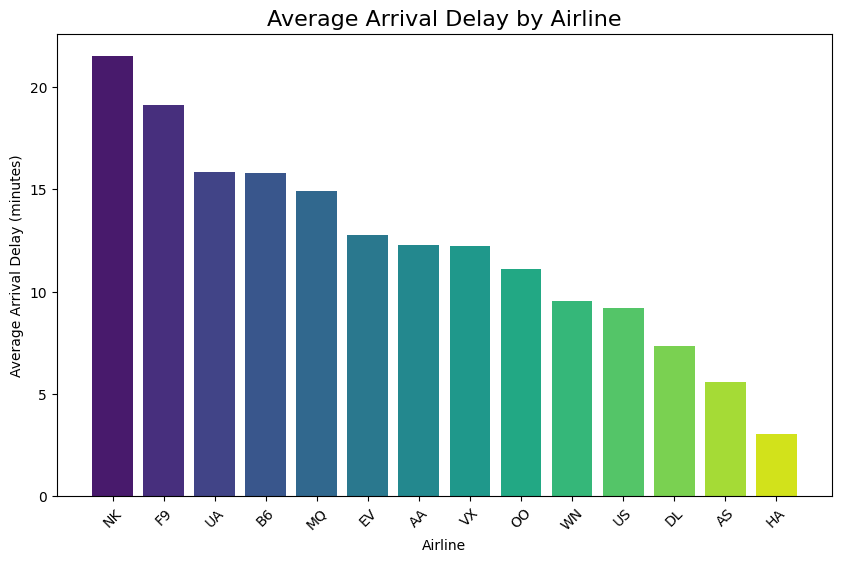

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average arrival delay by airline
avg_delay_by_airline = df.groupBy("AIRLINE").avg("ARRIVAL_DELAY").orderBy("avg(ARRIVAL_DELAY)", ascending=False).toPandas()

# Plot with distinct colors
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(avg_delay_by_airline))  # Use a color palette from seaborn
plt.bar(avg_delay_by_airline["AIRLINE"], avg_delay_by_airline["avg(ARRIVAL_DELAY)"], color=colors)
plt.xlabel("Airline")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay by Airline", fontsize=16)
plt.xticks(rotation=45)
plt.show()

**Arrival Delay Distribution**: This distribution helps identify if delays are generally minor or if there are many severe delays, offering insights into the overall punctuality of flights in the dataset.

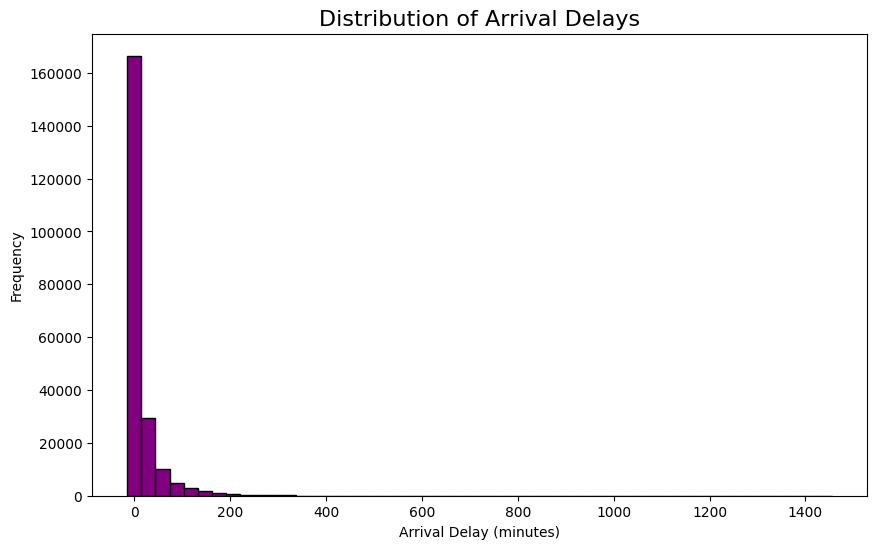

In [46]:
# Convert ARRIVAL_DELAY to Pandas for plotting
arrival_delay_data = df.select("ARRIVAL_DELAY").toPandas()

# Plot histogram with blue color
plt.figure(figsize=(10, 6))
plt.hist(arrival_delay_data["ARRIVAL_DELAY"].dropna(), bins=50, color="purple", edgecolor="black")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Arrival Delays", fontsize=16)
plt.show()

**MODEL BUILDING**

In [25]:
# Split the dataset into 80% training and 20% testing
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [26]:
from pyspark.ml.feature import VectorAssembler

# Select the features to include in the model
feature_columns = ["DEPARTURE_DELAY", "TAXI_OUT", "TAXI_IN", "AIR_SYSTEM_DELAY",
                   "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"]

# Assemble the features into a single vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

In [27]:
from pyspark.ml.classification import LogisticRegression

# Initialize Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="IS_DELAYED", predictionCol="prediction")

In [28]:
from pyspark.ml import Pipeline

# Create a pipeline with the assembler and classifier
pipeline = Pipeline(stages=[assembler, lr])  # Use lr for Logistic Regression

In [29]:
# Train the model on the training data
model = pipeline.fit(train_data)

In [30]:
# Make predictions on the test data
predictions = model.transform(test_data)
# Show a sample of predictions
predictions.select("IS_DELAYED", "prediction", "probability").show(10)

+----------+----------+--------------------+
|IS_DELAYED|prediction|         probability|
+----------+----------+--------------------+
|         1|       1.0|[0.07478206657707...|
|         0|       0.0|[0.55826721412425...|
|         1|       1.0|[1.01025014597051...|
|         1|       1.0|           [0.0,1.0]|
|         1|       0.0|[0.66263938594514...|
|         0|       0.0|[0.85211012380413...|
|         0|       0.0|[0.65409765050410...|
|         1|       1.0|[6.61017224731448...|
|         1|       1.0|[0.00163151487677...|
|         1|       1.0|[0.43769254724334...|
+----------+----------+--------------------+
only showing top 10 rows



In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize evaluators for accuracy and F1-score
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="IS_DELAYED", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="IS_DELAYED", predictionCol="prediction", metricName="f1")

# Calculate accuracy and F1-score
accuracy = evaluator_accuracy.evaluate(predictions)
f1_score = evaluator_f1.evaluate(predictions)

print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1_score}")

Model Accuracy: 0.8346065873741995
Model F1 Score: 0.832438985087642


OBSERVATION: The model achieved an accuracy of 83.4% and an F1 score of 83.2%, indicating strong performance in correctly classifying delayed and non-delayed flights. This balance between accuracy and F1 score suggests that the model handles both precision and recall effectively for this binary classification task.

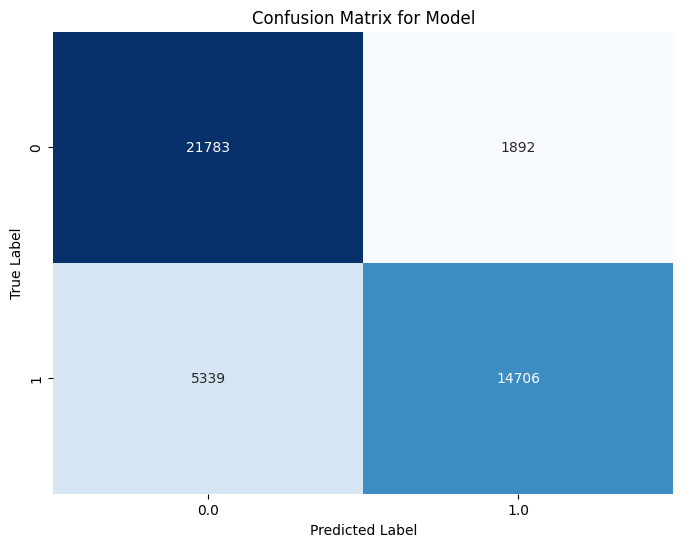

In [34]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a confusion matrix by counting combinations of actual and predicted labels
confusion_matrix = predictions.groupBy("IS_DELAYED", "prediction").count().toPandas()

# Pivot the confusion matrix for easy visualization
confusion_matrix = confusion_matrix.pivot(index="IS_DELAYED", columns="prediction", values="count").fillna(0)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Model")
plt.show()

**MODEL TUNING & EVALUATION**

In [32]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create a parameter grid for tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Set up cross-validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_f1,
                          numFolds=3)  # 3-fold cross-validation

# Run cross-validation, and choose the best set of parameters
cv_model = crossval.fit(train_data)

# Make predictions with the best model
cv_predictions = cv_model.transform(test_data)

# Evaluate the best model
cv_accuracy = evaluator_accuracy.evaluate(cv_predictions)
cv_f1_score = evaluator_f1.evaluate(cv_predictions)

print(f"Cross-Validated Model Accuracy: {cv_accuracy}")
print(f"Cross-Validated Model F1 Score: {cv_f1_score}")

Cross-Validated Model Accuracy: 0.8310612991765782
Cross-Validated Model F1 Score: 0.8280853330783526


CONCLUSION: After cross-validation and hyperparameter tuning, the model's accuracy slightly decreased to 82.95% (from 83.4%), and the F1 score decreased to 82.64% (from 83.2%). This suggests that the initial model was well-tuned, and additional tuning did not significantly improve performance; thus, the original model configuration might be preferred for simplicity.